<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada 2021</h1>
<h2>Pràctica 4 - Programació dinàmica</h2>
</center>
</div>

In [118]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [119]:
import numpy as np
import random
from matplotlib import pyplot as plt
import scipy.ndimage as nd
from tqdm.notebook import trange

%matplotlib inline

## Introducció a la llibreria _numpy_. Llistes vs arrays

In [120]:
# Els tractem igual tot i que són dos tipus de dades diferents
a = [1,2,3,4]
b = np.array([1,2,3,4])

print(a, type(a))
print(b, type(b))

[1, 2, 3, 4] <class 'list'>
[1 2 3 4] <class 'numpy.ndarray'>


In [121]:
# La suma de llistes i la suma d'arrays es comporta diferent
a1, a2 = [1,2,3,4], [5,6,7,8]
b1, b2 = np.array([1,2,3,4]), np.array([5,6,7,8])

print(a1+a2)
print(b1+b2)

[1, 2, 3, 4, 5, 6, 7, 8]
[ 6  8 10 12]


In [122]:
# Accedim a la dimensió d'una matriu de tamany 2x3. Observeu que la primera component és l'alçada i la segona l'amplada.
a = [[1,2,3], [4,5,6]]
b = np.array([[1,2,3],[4,5,6]])

print(len(a), len(a[0]))
print(b.shape)

2 3
(2, 3)


In [123]:
# Indexem igual per accedir a les files
print(a[0])
print(b[0])
print()
# En numpy podem seleccionar un element usant b[i,j] de la mateixa forma que podem fer b[i][j]
print(a[0][1])
print(b[0][1], b[0,1])

[1, 2, 3]
[1 2 3]

2
2 2


In [124]:
# Podem definir el 'tipus' de dada que volem fer servir
b1 = np.array([1,2,3,4], dtype=int)
b2 = np.array([1,2,3,4], dtype=float)

print(b1)
print(b2)

[1 2 3 4]
[1. 2. 3. 4.]


## Conceptes bàsics imatges

Una imatge en color, RGB, no és més que una matriu tridimensional $W\times H\times 3$ on $W$ és l'amplada, $H$ és l'alçada i 3 són els canals R (Red), G (Green), B (Blue).

<img src="./img/rgb.png" width=20%>

Shape: (32, 32, 3)


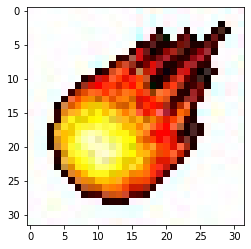

In [125]:
# Carreguem una imatge petita
# Generalment les imatges tenen valors de 0 a 255. Nosaltres treballarem en el rang 0 a 1 i per això dividim tots els valors per 255.
im = plt.imread('img/fireball.jpg')/255

# Així podem observar la seva mida.
print("Shape:",im.shape)

# Podem visualitzar-la utilitzant la funció 'imshow' de la llibreria matplotlib.pyplot
plt.imshow(im)
plt.show()

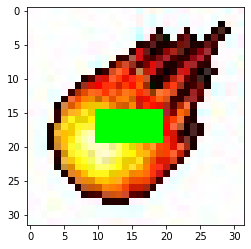

In [126]:
# Podem modificar-la utilitzant slicing
# Observeu que li assignem el color verd ja que [0, 1, 0] = [R, G, B] = [Red, Green, Blue]
im[15:20, 10:20] = [0,1,0]
plt.imshow(im)
plt.show()

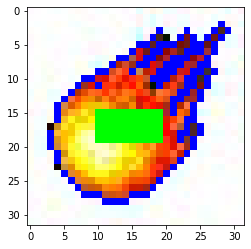

In [127]:
# També podem modificar-la usant una condició sobre els seus píxels
# Tots els píxels tals que la seva component blava (2a component, índex 1) sigui igual a zero,
# la transformem en color blau (0,0,1).
# Com podeu veure el color negre pur és [0,0,0] i, com que té la segona component blava a zero, 
# queda transformat en blau.

im[im[:,:,1] == 0] = [0,0,1]

plt.imshow(im)
plt.show()

<div class="alert alert-success">
    <h1>Problema 1: Implementació de l'algorisme Seam Carving</h1>
    <p>
        L'algorisme Seam Carving ens permet reduir la mida de les imatges en una de les seves dues dimensions (horitzontalment, per exemple) a través d'un algorisme senzill de programació dinàmica. Ens permet fer la següent reducció:
    </p>    
    <img src='img/seamcarving.jpg' width='60%'>
    <b>Sembla màgia, no?</b><br><br>
    S'agafa la imatge original i se'n calcula el gradient. A continuació es generen tots els camins a través de la programació dinàmica, es troba un camí mínim i s'elimina. Es repeteix aquest procediment fins a obtenir el resultat desitjat. Observa'n un altre exemple:
    <img src='img/seamcarving_alg.png' width='80%'><br>
    En aquest cas hem reduit la imatge original en 150 píxels, horitzontalment. Com veieu, la major part dels objectes es conserven ja que s'han eliminat zones 'suaus' com el cel i la sorra.
    <br><br>
    <h3>Implementació</h3>
    <ol>
        <li> Implementeu una funció <code>superior_neighbors</code> que retorni els veïns superiors d'un punt d'una imatge 2-D. A la capçalera de la funció trobareu els tres casos que cal tenir en compte
        <li> Implementeu una funció <code>minimal_paths</code> que, usant el següent algorisme de programació dinàmica, construeixi la matriu de camins, $D$. Aquesta funció ha d'usar la funció <code>superior_neighbors</code> per obtenir els veïns.<br>
            Sigui $G$ la imatge de gradient i sigui $D$ la matriu de camins mínims que hem d'omplir, ambdues de dimensió $H \times W$ :
            $$D_{i,j} = \begin{cases}
                            G_{i,j}+\min\Big(D_{i-1, j},\ D_{i-1,j+1}\Big) \quad \text{if} \ j=0\\
                            G_{i,j}+\min\Big(D_{i-1, j-1},\ D_{i-1, j}\Big) \quad \text{if} \ j=W-1\\
                            G_{i,j}+\min\Big(D_{i-1, j-1},\ D_{i-1, j},\ D_{i-1,j+1}\Big) \quad \text{else}                                      
                        \end{cases}$$
        <li> Implementeu una funció <code>find_min_path</code> que retorni el camí mínim sobre la imatge anterior, $D$. Per trobar-lo, l'algorisme ha de començar per la part inferior de la imatge i anar pujant fins a arribar a la part superior.
        <li> Implementeu una funció <code>delete_path</code> que elimini el camí mínim retornat per la funció anterior de la imatge original.
        <li> Implementeu una funció <code>reduce_image</code> que repeteixi tot el procés anterior un nombre finit de vegades, $N$.
    </ol>
</div>

Funcions auxiliars:

In [128]:
def get_gradient(im):
    """
    Donada una imatge, en calcula el gradient
    
    Params
    ======
    :im: Imatge de la que en volem calcular el gradient
    
    Returns
    =======
    :gradient: Gradient horitzontal de la imatge
    
    """
    
    # Transformem la imatge a un sol canal (blanc i negre)
    im_blackwhite = np.dot(im[...,:3], [0.299, 0.587, 0.114])
    
    # Calculem el gradient usant sobel
    gradient = np.abs(nd.sobel(im_blackwhite))
    return gradient


def show_row(im_and_titles):
    """
    Donat un conjunt d'imatges i els seus títols, els mostra en una sola línia
    
    Params
    ======
    :im_and_titles: Llista de tuples en el format [(im, title), ...]    
    """
    
    # Creem una figura d'una sola línia
    fig, axs = plt.subplots(1,len(im_and_titles),figsize=(len(im_and_titles)*8,5))
    
    # Iterem el conjunt d'imatges i mostrem la imatge amb el seu títol
    for i, (im, title) in enumerate(im_and_titles):
        axs[i].imshow(im)
        axs[i].set_title(title)
        axs[i].set_axis_off()

    plt.tight_layout()
    plt.show()
    
    
def add_min_path(im, path, color=[1,0,0]):
    """
    Donada una imatge i un camí, afegeix el camí en un color donat. Per defecte, vermell.
    
    Params
    ======
    :im: Imatge sense el camí
    :path: Camí que volem afegir
    :color: Color del camí
    
    Returns
    =======
    :im: Imatge amb el camí afegit
    """
    for i, j in path:
        im[i][j]=color
    return im

Exemple d'ús:

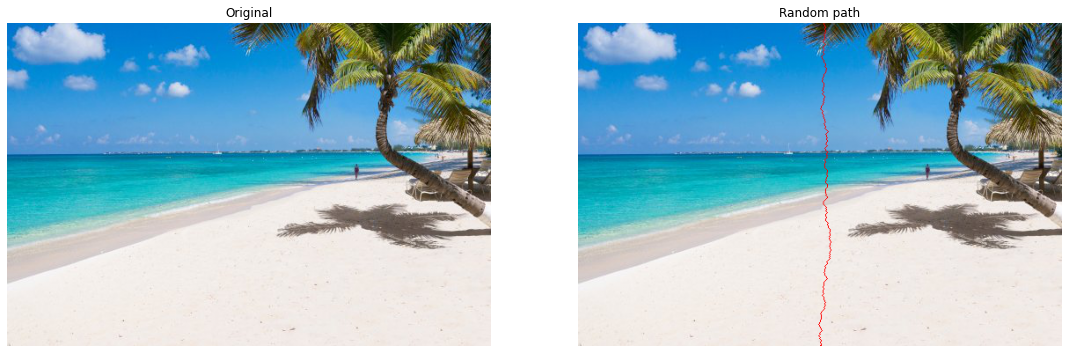

In [129]:
# Carreguem una imatge
im = plt.imread('img/beach.jpg')/255

# Creem un camí aleatori
i = im.shape[0]-1
path = [(i, im.shape[1]//2)]
while i >= 0:
    path.append((i, min(max(0, path[-1][1] + random.randint(-1,1)),im.shape[1]-1)))
    i-=1

# Afegim el camí a una imatge diferent
im_path = im.copy()
im_path = add_min_path(im_path, path)

# Usem la funció show_row per mostrar les imatges amb els seus títols.
im_titles = [(im, 'Original'), (im_path, 'Random path')]
show_row(im_titles)

## Gradient horitzontal

El <b>gradient horitzontal</b> d'una imatge ens permet trobar els punts de màxim canvi <b>vertical</b> en una imatge. Dit d'una altra forma, ens ressalta els contorns verticals.<br><br>
Observeu com podem usar la funció <code>get_gradient()</code> que us donem implementada:

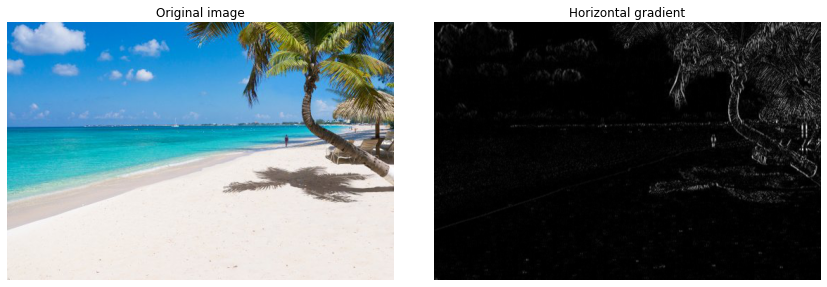

In [130]:
im = plt.imread('img/beach.jpg')/255

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Mostrem la imatge
axs[0].imshow(im)
axs[0].set_title('Original image')
axs[0].set_axis_off()

# Mostrem el gradient horitzontal de la imatge
gradient = get_gradient(im)
axs[1].imshow(gradient, cmap='gray')
axs[1].set_title('Horizontal gradient')
axs[1].set_axis_off()

plt.tight_layout()
plt.show()

In [131]:
def superior_neighbors(mat, point):
    """
    Donada una matriu de mida H x W i punt, retorna els punts de la fila superior adjacents al punt passat com a paràmetre.
    Cal tenir en compte els següents casos. Considerant que el punt té coordenades (i,j):
        - Si el punt té coordenada j=0, vol dir que estem agafant un punt del marge esquerre de la imatge. Només s'han de retornar DOS veïns.
        - Si el punt té coordenada j=(W-1), vol dir que estem agafant un punt del marge dret de la imatge. Només s'han de retornar DOS veïns.
        - En la resta de casos, es retornen els tres veïns superiors.
        
    Params
    ======
    :mat: Una matriu 2-Dimensional
    :point: Un sol punt amb el format (i,j)
    
    Returns
    =======
    :neighbors: Una llista de dos o tres elements en funció de cada cas.
    """
    # desgranem el punt en coordenades i,j
    i,j = point
    # Si la imatge és buida, no executem el programa: array buit, array amb tupla buida, ...
    if 0 in mat.shape or len(mat.shape) < 2:
        return;
    h, w = mat.shape
    # si tenim solament una columna
    if w == 1:
        return np.array([mat[0][j-1]])
    if(i != 0): # en cas que estiguem a la primera fila no fem res 
        if (j == 0): # extrem esquerre
            return np.array([mat[i-1,j],mat[i-1,j+1]]);
        elif(j == w-1): # extrem dret
            return np.array([mat[i-1,j-1],mat[i-1,j]]);
        else:
            return np.array([mat[i-1,j-1],mat[i-1,j],mat[i-1,j+1]]);
    return np.array([0])


def minimal_paths(mat):
    """
    Creació de tots els camins mínims usant programació dinàmica.
    Cal usar la funció 'superior_neighbors' per trobar els veïns.
    
    Params
    ======
    :mat: Matriu 2-Dimensional d'entrada (gradient)
    
    Returns
    =======
    :ret: Matriu 2-Dimensional de la mateixa mida que 'mat' amb els camins mínims calculats.
    """
   # Si la imatge és buida, no executem el programa: array buit, array amb tupla buida, ...
    if 0 in mat.shape or len(mat.shape) < 2:
        return;
    # creem una còpia per calcular els camins mínims
    ret = mat.copy()
    # iterem per mat i apliquem la operació de l'enunciat
    for i in range(0,ret.shape[0]):
        for j in range(0,ret.shape[1]):
            ret[i,j] = mat[i,j] + min(superior_neighbors(ret, (i,j)))
    return ret

def minposition(mat,point):
    """
    Donada la matriu i un punt que en pertany, calcula la posició del mínim veí.
    És com un superiorneighbours del qual obtenim, en canvi, la posició 
    
    Params
    ======
    :mat: Matriu 2-D Dimensional
    :point: Punt sobre el qual hem de treballar
    
    Returns
    =======
    :nei: Una tupla (i,j) que representa la posició el veí de valor mínim 
    """
    i,j = point
    # Si la imatge és buida, no executem el programa: array buit, array amb tupla buida, ...
    if 0 in mat.shape or len(mat.shape) < 2:
        return;
    h, w = mat.shape
    # guardarem un array d'elements i un altre de posicions
    pos = []; elements = np.array([])
    # si tenim solament una columna
    if w == 1:
        return (0,j-1)
    # altres casos
    if(i != 0): # en cas que estiguem a la primera fila no fem res 
        if (j == 0): # extrem esquerre
            elements = np.append(elements,[mat[i-1,j],mat[i-1,j+1]])
            pos = [(i-1,j),(i-1,j+1)]
        elif(j == w-1): # extrem dret
            elements = np.append(elements,[mat[i-1,j-1],mat[i-1,j]])
            pos = [(i-1,j-1),(i-1,j)]
        else:
            elements = np.append(elements,[mat[i-1,j-1],mat[i-1,j],mat[i-1,j+1]])
            pos = [(i-1,j-1),(i-1,j),(i-1,j+1)]
        index = np.argmin(elements) # ens quedem amb l'índex del menor element
        return pos[index]
    else:
        return 

def find_min_path(mat):
    """
    Donada una matriu, calcula el camí mínim sobre aquesta. L'algorisme ha de començar per la part inferior i buscar el següents punts.
    
    Params
    ======
    :mat: Matriu de camins mínims
    
    Returns
    =======
    :min_path: Una llista de tuples amb les coordenades (i,j) del camí mínim. La primera coordenada ha d'anar decrementant sempre en 1.
               Exemple. Suposant que una imatge té d'alçada 341 píxels, un possible camí seria: [(340, 120), (339, 121), (338,120), ..., (0, 151)] 
    """
    # Si la imatge és buida, no executem el programa: array buit, array amb tupla buida, ...
    if 0 in mat.shape or len(mat.shape) < 2:
        return;
    H, W = mat.shape;
    # Si la imatge és un sol píxel, 
    min_path = [(H-1,np.argmin(mat[H-1]))] # comencem pel l'element mínim de la última fila
    for i in range(H-2,-1,-1):       
        min_path.append(minposition(mat,min_path[-1])); # creem una funció auxiliar que ens permeti retornar la posició en la matriu
    return min_path


def delete_path(im, path):
    """
    Donat una imatge i un camí, elimina els pixels de la imatge que pertanyen del camí.
    Podeu usar la següent instrucció per inicialitzar la imatge. Això crea una imatge amb tots els valors a zero.
    
    im_new = np.zeros((im.shape[0], im.shape[1]-1, im.shape[2]))
    
    Params
    ======
    :im: Una imatge de mida H x W x 3
    :path: Un camí sobre la imatge. 
    
    Returns
    =======
    :im_new: Una nova imatge de mida H x (W-1) x 3 amb el camí eliminat
    """
    # Si la imatge és buida, no executem el programa: array buit, array amb tupla buida, ...
    if 0 in im.shape or len(im.shape) < 3:
        return;
    # com que hem fet que el path sigui un set, una operació de cerca té cost 1
    im_new = np.zeros((im.shape[0], im.shape[1]-1, im.shape[2]))
    counter = 0
    for i in range(0,im_new.shape[0]): # a cada fila hi haurà un element a ignorar
        visited = False
        for j in range(0,im_new.shape[1]):
            if (i,j) in path or visited:
                visited = True
                im_new[i,j] = im[i,j+1];
            else:
                im_new[i,j] = im[i,j];
    return im_new


def reduce_image(im, N=100):    
    """
    Implementació de l'algorisme Seam Carving. 
    Useu la funció 'show_row' al finalitzar per mostrar una figura amb tres subfigures:
        - Imatge original
        - Primer camí que s'elimina
        - Imatge resultant després de N iteracions
    
    Params
    ======
    :im: Imatge que volem reduir
    :N: Nombre de cops que repetirem l'algorisme
    """
    # Copiem la imatge inicial
    iminicial = im.copy()
    first_cut = im.copy()
    
    # Si la imatge és buida, no executem el programa: array buit, array amb tupla buida, ...
    if 0 in im.shape or len(im.shape) < 3:
        return;
    
    # Cos del programa
    for i in trange(min(im.shape[1],N)): # evidentment, si N>width, es pararà a width
        grad = minimal_paths(get_gradient(im)) 
        path = find_min_path(grad)
        if i == 0:
            first_cut = add_min_path(im, path)
        im = delete_path(im,set(path))
        
    # Mostrem les imatges en una graella
    show_row([(iminicial,"Imatge inicial"),(first_cut, "Primer tall"),(im, "Imatge final")])

Comproveu la vostra solució

  0%|          | 0/10 [00:00<?, ?it/s]

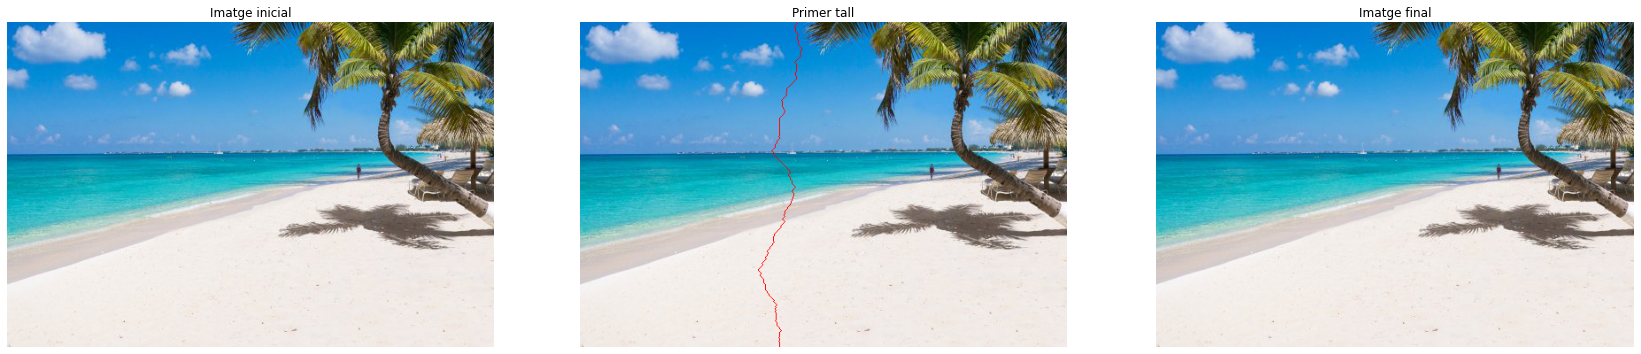

In [132]:
im = plt.imread('img/beach.jpg')/255
reduce_image(im,10)

  0%|          | 0/150 [00:00<?, ?it/s]

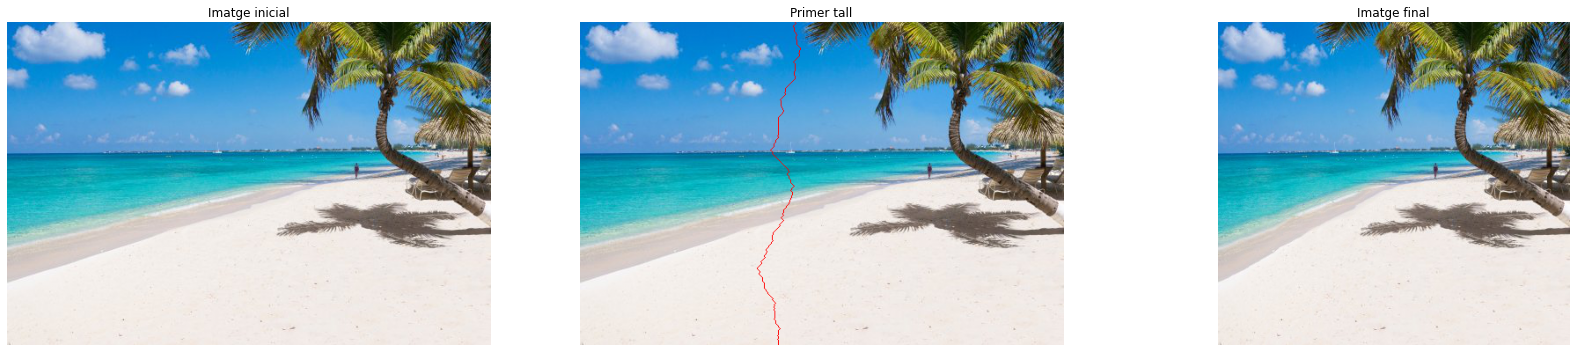

In [133]:
im = plt.imread('img/beach.jpg')/255
reduce_image(im,150)

<div class="alert alert-success">
    <h1>Problema 2: Eliminar objectes d'una imatge</h1>
    <p>Modifiqueu l'algorisme anterior per a eliminar objectes d'una imatge. Només heu d'implementar la funció <code>remove_patch</code>. <br>Per exemple:</p>
    <img src='img/im_patched.png' width='80%'>
    <b>Pista:</b> Ens hem d'assegurar que els camins mínims sempre passin per l'interior del patch.
</div>

In [134]:
def add_patch(im, patch):
    """
    Donada una imatge i un patch. Mostra la imatge amb el patch d'un color donat. Per defecte, vermell.
    
    Params
    ======
    :im: La imatge a la que volem afegit el patch
    :patch: Patch amb quatre coordenades. Format: [(i1,j1), (i2, j2)]
    
    Returns
    =======
    :im: Imatge amb els píxels del patch en vermell.
    """
    
    # Si la imatge és buida, no executem el programa: array buit, array amb tupla buida, ...
    if 0 in im.shape or len(im.shape) < 3:
        return;
    
    for i in range(patch[0][0], patch[1][0]+1):
        for j in range(patch[0][1], patch[1][1]+1):
            im[i][j] = [1,0,0]
    return im

def remove_patch(im, patch):
    """
    Donada una imatge i un patch, n'elimina tots els punts interiors al patch.
    Useu la funció 'show_row' al finalitzar per mostrar una figura amb tres subfigures:
        - Imatge original
        - Imatge amb el patch de color vermell
        - Imatge resultant després d'eliminar el patch
    
    Params
    ======
    :im: Imatge original
    :patch: Patch amb dos parells de coordenades. 
            Format: [(i1,j1), (i2, j2)]. Sempre se satisfà que i1<i2, j1<j2.
            (i1, j1) és la coordenada superior esquerra del patch
            (i2, j2) és la coordenada inferior dreta del patch.
            Aquestes dues parelles s'han d'incloure com a part del patch.
    """
    # Copiem la imatge inicial
    iminicial = im.copy()
    first_cut = im.copy()
    
    # Si la imatge és buida, no executem el programa: array buit, array amb tupla buida, ...
    if 0 in im.shape or len(im.shape) < 3:
        return;
    
    # Posem el patch
    im = add_patch(im, patch)
    
    # Cos del programa
    H, W = patch[1][0]-patch[0][0], patch[1][1]-patch[0][1]
    for i in trange(0,W+1):
        grad = get_gradient(im)
        # Posem que el gradient dins del patch sigui ridículament petit (però finit)
        for j in range(0,W+1-i):
            for k in range(0,H+1):
                grad[patch[0][0]+k,patch[0][1]+j] = -100000
        # A partir d'aquí el procediment és anàleg a l'anterior
        grad = minimal_paths(grad)
        path = find_min_path(grad)
        if i == 0:
            first_cut = add_min_path(im, path)
        im = delete_path(im,set(path))
        # im = add_min_path(im, path) # l'utilitzem per comprovar què talla en particular
        # print(grad[156:189,391:403]); print("\n"); # l'utilitzem per controlar que agafa bé els camins mínims
        
    # Mostrem les imatges en una graella
    show_row([(iminicial,"Imatge inicial"),(first_cut, "Primer tall"),(im, "Imatge final")])

Comproveu la vostra solució.

  0%|          | 0/13 [00:00<?, ?it/s]

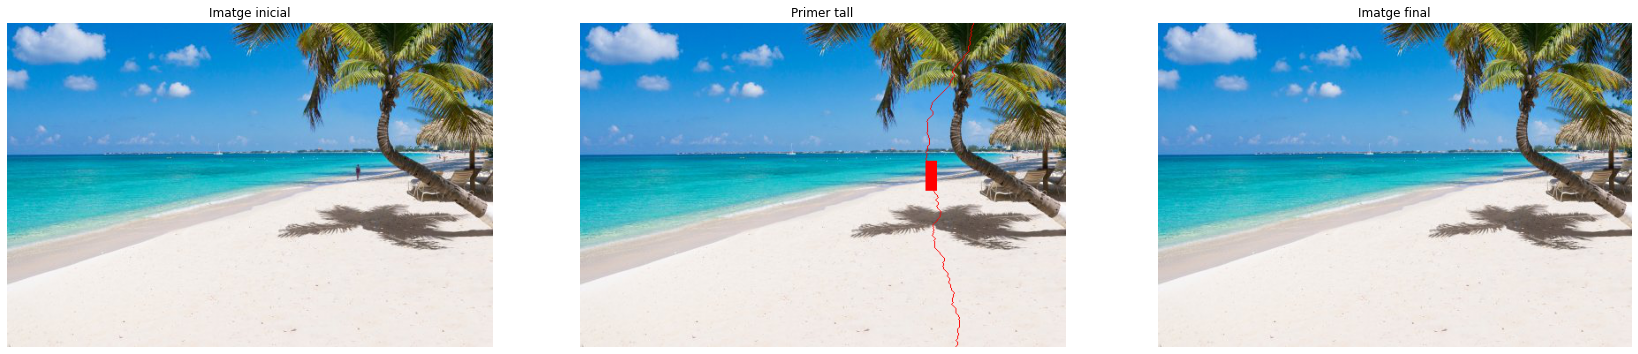

In [135]:
im = plt.imread('img/beach.jpg')/255
patch = [(156,391), (189,403)]

remove_patch(im, patch)

<div class="alert alert-success">
    <h1>Banc de proves</h1>
    <p>Aquí comprovarem que la funció és robusta per als casos extrems que ens plantegem. Alguns d'aquests són, per exemple, una imatge buida o una imatge tota de zeros.</p>
    <em>Utilitzarem com a referència la imatge landscape de la carpeta de la pràctica</em>
</div>

  0%|          | 0/100 [00:00<?, ?it/s]

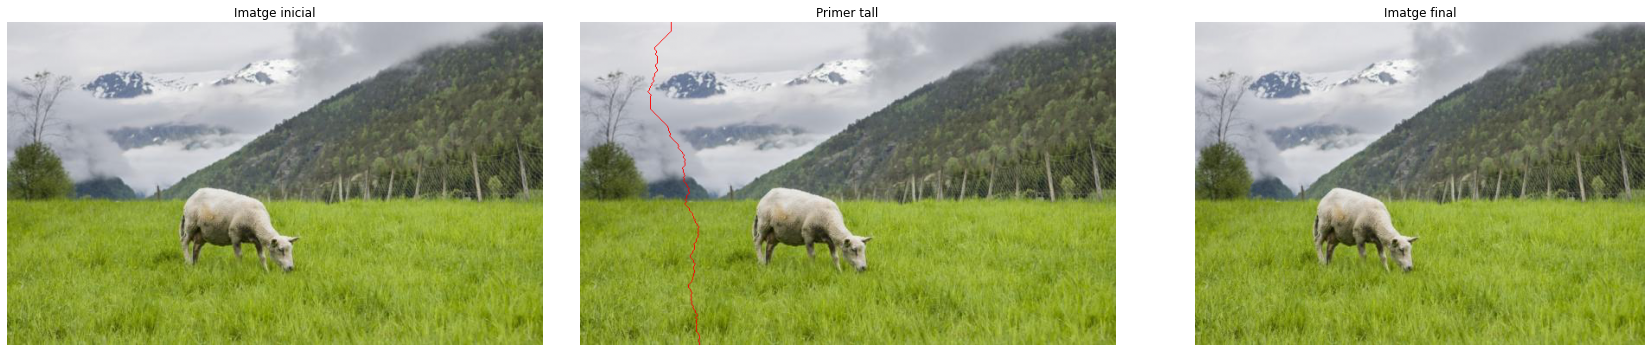

In [136]:
# Primera prova: reduïm la imatge
im = plt.imread('img/landscape.jpg')/255
reduce_image(im,100)

  0%|          | 0/151 [00:00<?, ?it/s]

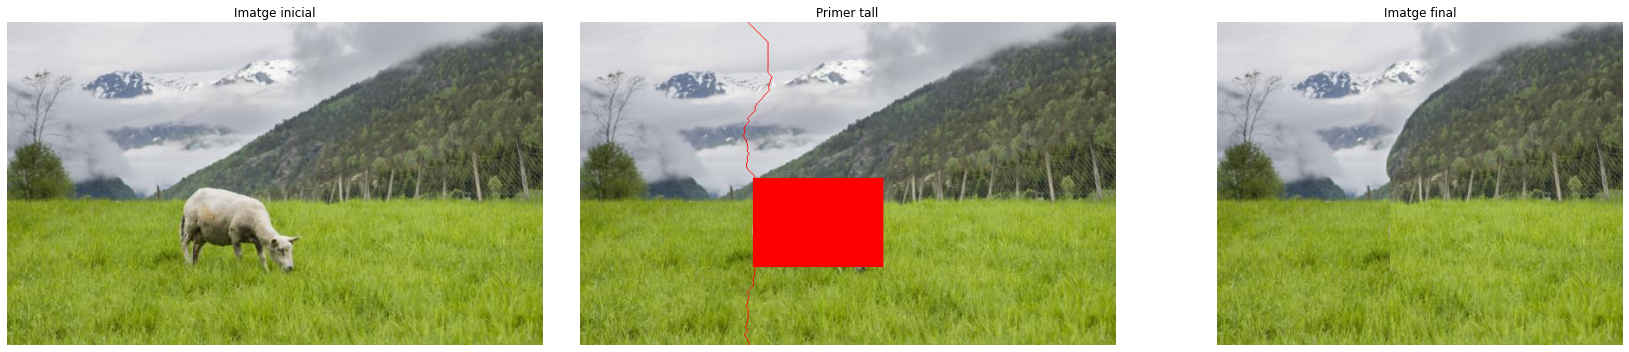

In [137]:
# Segona prova: ens carreguem la vaca
im = plt.imread('img/landscape.jpg')/255
patch = [(180,200), (282,350)]
remove_patch(im, patch)

In [138]:
# Tercera prova: li passem un array buit
im = np.array([])/255
assert reduce_image(im,100) == None
reduce_image(im,100)

In [139]:
# Quarta prova: li passem un array amb una única tupla, buida
im = np.array([()])/255
assert reduce_image(im,100) == None
reduce_image(im,100)

In [140]:
# Cinquena prova: un sol píxel
h,w,d=1,1,3

A = np.zeros((h,w,d))
from random import uniform
for i in range(h):
    for j in range(w):
        for k in range(d):
            A[i,j,k] = uniform(0,1)
            
assert reduce_image(im,100) == None
reduce_image(im,100)

In [141]:
# Sisena prova: una sola columna de píxels
h,w,d=10,1,3

A = np.zeros((h,w,d))
from random import uniform
for i in range(h):
    for j in range(w):
        for k in range(d):
            A[i,j,k] = uniform(0,1)
            
assert reduce_image(im,100) == None
reduce_image(im,100)

In [143]:
# Setena prova: una sola fila de píxels
h,w,d=1,10,3

A = np.zeros((h,w,d))
from random import uniform
for i in range(h):
    for j in range(w):
        for k in range(d):
            A[i,j,k] = uniform(0,1)
            
assert reduce_image(im,100) == None
reduce_image(im,100)

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>

<p>
L'entrega es farà a través del campus virtual. Teniu fins el dia <b>8 de Desembre a les 23:55</b> per entregar la pràctica. A la tasca que obrirem al campus, <b>només heu d'entregar aquest fitxer .ipynb</b>. El notebook ha de tenir com a nom:
</p>
<p>
    <code>L4_Grup_Cognom_Nom.ipynb</code>
</p>
    <br>
On 'Grup' és una sola lletra que identifica el grup on esteu matriculats. Els grups disponibles són: A, B, C, F.

És imprescindible que respecteu el format de les funcions i que el vostre codi estigui degudament comentat.<br><br>
</div>